In [1]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [192]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report,roc_auc_score, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import seaborn as sns

from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix

import lazypredict
from lazypredict.Supervised import LazyClassifier

import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_csv(f"Credit_card.csv")
df_labels= pd.read_csv(f"Credit_card_label.csv")

In [5]:
def get_metadata(dataframe):
    '''
    A function that fetches all the Metadata Information about the Dataframe
    This function can be reused for all Pandas Dataframe
    '''
    print("\nBASIC INFORMATION\n")
    print(dataframe.info())
    print("=" * 80)
    print("Dataframe Shape\n", dataframe.shape)
    print("=" * 80)
    print("Number of Duplicate Rows\n", dataframe.duplicated().sum())
    print("=" * 80)
    print("NULL Values Check")
    print(dataframe.isnull().sum())
    print("=" * 80)

In [6]:
get_metadata(df)



BASIC INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 

In [7]:
df.drop("Ind_ID",axis=1).loc[:,:].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

In [8]:
df = pd.concat([df,df_labels],axis=1).drop("Ind_ID",axis=1)


In [9]:
df.sample(5)


GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
389       M         Y             Y         0      180000.00   
377       F         Y             Y         0      225000.00   
176       M         Y             N         0      225000.00   
724       M         N             Y         0      108000.00   
1005      F         N             N         0      351000.00   

               Type_Income                      EDUCATION Marital_status  \
389                Working  Secondary / secondary special        Married   
377   Commercial associate               Higher education        Married   
176   Commercial associate  Secondary / secondary special        Married   
724                Working  Secondary / secondary special        Married   
1005  Commercial associate               Higher education        Married   

           Housing_type  Birthday_count  Employed_days  Mobile_phone  \
389   House / apartment       -19565.00          -3246             1   
377   House / apartment       -10457.00           -979             1   
176   House / apartment       -17762.00          -2484             1   
724   House / apartment       -15997.00          -7341             1   
1005  House / apartment       -21574.00          -1081             1   

      Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  label  
389            0      0         0             NaN               2      0  
377            0      0         0             NaN               2      0  
176            0      0         0        Laborers               2      0  
724            1      1         0        Laborers               2      0  
1005           0      1         0             NaN               2      0

<Axes: xlabel='label'>

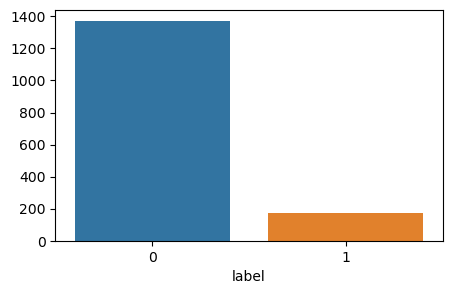

In [10]:
plt.figure(figsize=(5, 3))
sns.barplot(x=df_labels.label.value_counts().index,y=df_labels.label.value_counts().values)

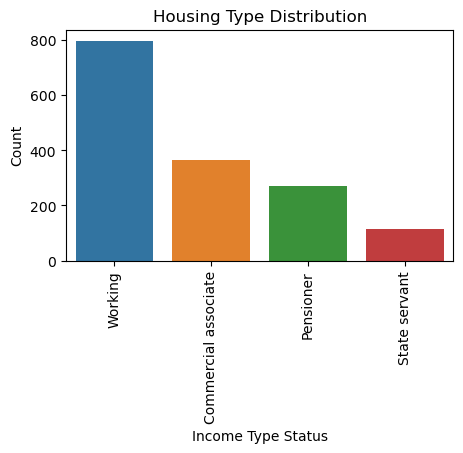

In [11]:
plt.figure(figsize=(5, 3))
sns.barplot(x=df.Type_Income.value_counts().index,y=df.Type_Income.value_counts().values)
plt.xlabel('Income Type Status')
plt.ylabel('Count')
plt.title('Housing Type Distribution')
plt.xticks(rotation=90)
plt.show()

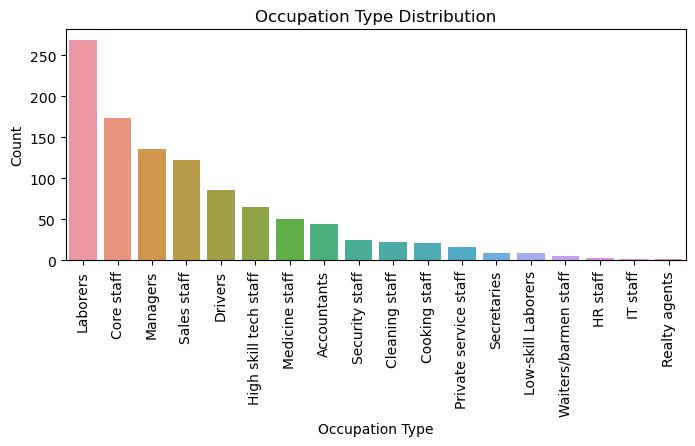

In [12]:
plt.figure(figsize=(8, 3))
sns.barplot(x=df.Type_Occupation.value_counts().index,y=df.Type_Occupation.value_counts().values)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Occupation Type Distribution')
plt.xticks(rotation=90)
plt.show()

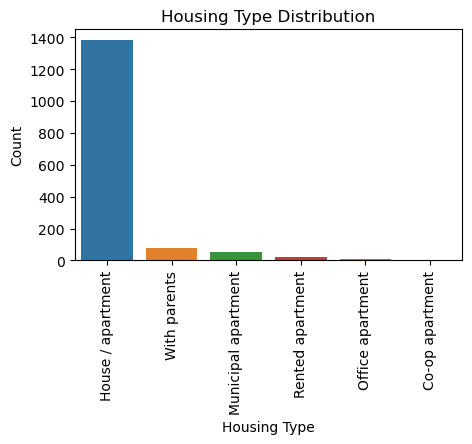

In [13]:
plt.figure(figsize=(5, 3))
sns.barplot(x=df.Housing_type.value_counts().index,y=df.Housing_type.value_counts().values)
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.title('Housing Type Distribution')
plt.xticks(rotation=90)
plt.show()

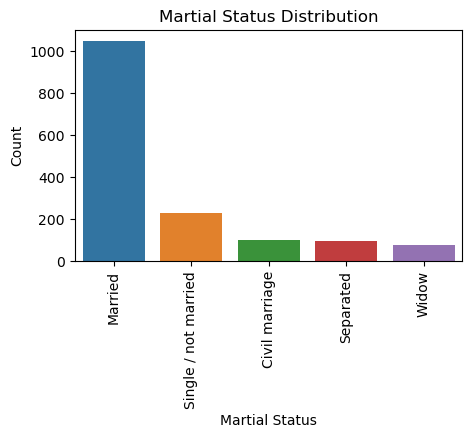

In [14]:
plt.figure(figsize=(5, 3))
sns.barplot(x=df.Marital_status.value_counts().index,y=df.Marital_status.value_counts().values)
plt.xlabel('Martial Status')
plt.ylabel('Count')
plt.title('Martial Status Distribution')
plt.xticks(rotation=90)
plt.show()

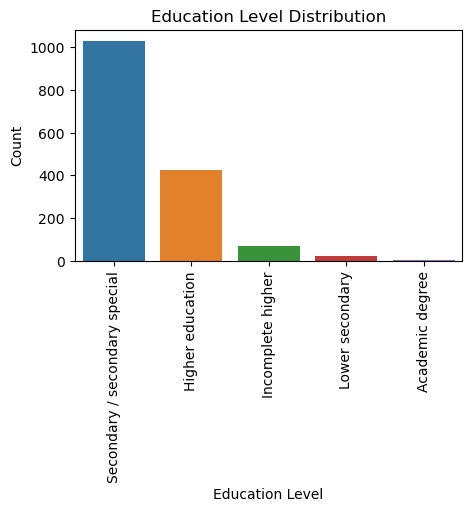

In [15]:

plt.figure(figsize=(5, 3))
sns.barplot(x=df.EDUCATION.value_counts().index,y=df.EDUCATION.value_counts().values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(rotation=90)
plt.show()

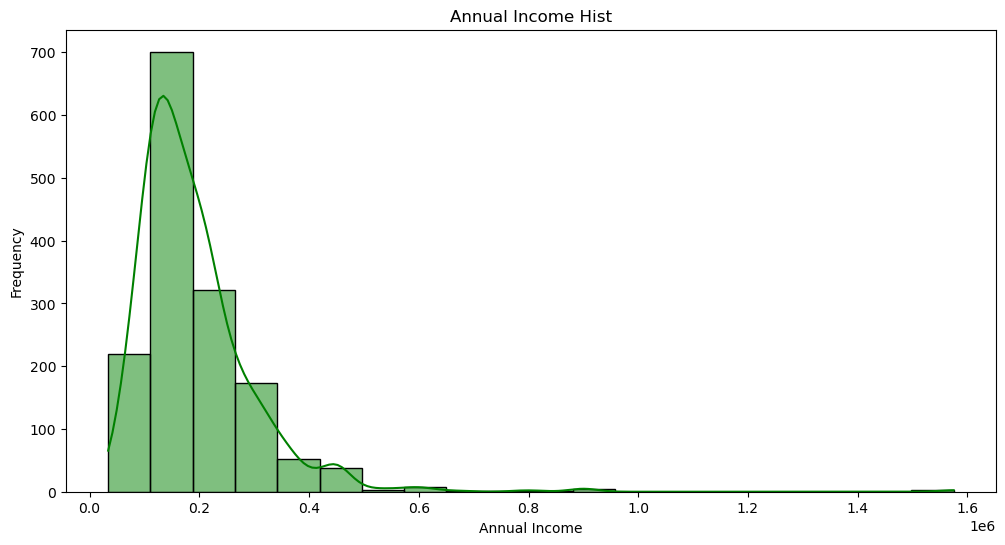

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Annual_income'], bins=20, color='GREEN', kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Annual Income Hist')
plt.show()

In [17]:
#Data Preprocess

In [18]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [19]:
from imblearn.over_sampling import RandomOverSampler

def preprocessing_data(df,engineering_LogTransform = False):
 
    # Filling Na Values with mod
    nan_columns_mod = ["GENDER","Type_Occupation"]
    for i in nan_columns_mod:
        mode_col = df[i].mode()[0]
        df[i].fillna(mode_col, inplace=True)
        
    # Filling Na Values with mean
    nan_columns_mean = ["Annual_income","Birthday_count"]
    for i in nan_columns_mean:
        mean_col = df[i].mean()
        df[i].fillna(mean_col, inplace=True)

    # Outlier clear      
    numeric_columns = ["Annual_income", "Birthday_count", "Employed_days"]
    for col in numeric_columns:
        mean_ = df[col].mean()
        std_ = df[col].std()
        threshold_ = 1.96

        df = df[(df[col] >= (mean_ - threshold_ * std_)) &
                (df[col] <= (mean_ + threshold_ * std_))]
        
    # Data Binary Encoding✅
    binary_columns = ["GENDER","Car_Owner","Propert_Owner"]

    for col in binary_columns:
        if not "GENDER" == col:
            df[col] = df[col].replace({"Y":1,"N":0})
        else: 
            df[col] = df[col].replace({"M":1,"F":0})
            
            
    # Categorical Encoding ✅
#     df1["LUNG_CANCER"] = df["LUNG_CANCER"].replace({"YES":1,"NO":0})
#          df1["GENDER"] = df["GENDER"].replace({"M":1,"F":0})

    # One-Hot Encoding
    for column in ['Type_Income', 'Type_Occupation', 'Housing_type', 'Marital_status', 'EDUCATION']:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1).reset_index(drop=True)
    
    # Birthday / Unemployed transform
    df["Age"] = df["Birthday_count"].apply(lambda x : abs(int(x))/365)
    df = df.drop("Birthday_count", axis=1)
    
    # Train-test split ✅  
    X = df.drop("label",axis=1)
    y = df["label"]
    
    X_over,y_over=RandomOverSampler().fit_resample(X,y) #Oversampling

    X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,stratify=y_over, random_state=3)
    
    if engineering_LogTransform:
        
        X_train["Employed_days"] = np.log(X_train["Employed_days"].abs())
        X_test["Employed_days"] = np.log(X_test["Employed_days"].abs())
        
        X_train['Annual_income'] = X_train['Annual_income'].apply(lambda x: x ** 0.5)
        X_test['Annual_income'] = X_test['Annual_income'].apply(lambda x: x ** 0.5)
        
#         bins = [0, 257.1, 370, 480, float('inf')]
#         X_train['Annual_income_binned'] = pd.cut(X_train['Annual_income'], bins=bins, labels=['Low', 'Medium', 'High', 'Very High'], right=False)
#         X_train = X_train.drop('Annual_income',axis=1)
        
#         X_test['Annual_income_binned'] = pd.cut(X_test['Annual_income'], bins=bins, labels=['Low', 'Medium', 'High', 'Very High'], right=False)
#         X_test = X_test.drop('Annual_income',axis=1)
        
    else:
        scaler = StandardScaler()
        
        features = ['Employed_days', 'Annual_income']
        X_train[features] = scaler.fit_transform(X_train[features])
        X_test[features] = scaler.transform(X_test[features])
        
        
    # Scale X ✅
#     scaler = StandardScaler()
    
    
#     X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
#     X_test['AGE']=scaler.transform(X_test[['AGE']])
    
#     X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
#     X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [20]:
X_train, X_test, y_train, y_test = preprocessing_data(df,engineering_LogTransform = True)

In [21]:
X_train.sample(5)


GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
1560       1          1              0         1         367.42   
261        0          0              1         1         300.00   
1882       1          1              1         0         459.89   
2153       0          0              1         0         354.96   
1075       1          0              0         0         474.34   

      Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  ...  \
1560           7.39             1           0      1         0  ...   
261            7.58             1           0      1         0  ...   
1882           8.93             1           0      0         0  ...   
2153           7.81             1           0      0         0  ...   
1075           7.48             1           1      0         0  ...   

      Marital_status_Married  Marital_status_Separated  \
1560                   False                     False   
261                     True                     False   
1882                    True                     False   
2153                   False                     False   
1075                   False                     False   

      Marital_status_Single / not married  Marital_status_Widow  \
1560                                 True                 False   
261                                 False                 False   
1882                                False                 False   
2153                                 True                 False   
1075                                 True                 False   

      EDUCATION_Academic degree  EDUCATION_Higher education  \
1560                      False                       False   
261                       False                       False   
1882                      False                       False   
2153                      False                        True   
1075                      False                        True   

      EDUCATION_Incomplete higher  EDUCATION_Lower secondary  \
1560                        False                      False   
261                         False                      False   
1882                        False                      False   
2153                        False                      False   
1075                        False                      False   

      EDUCATION_Secondary / secondary special   Age  
1560                                     True 35.70  
261                                      True 27.88  
1882                                     True 41.22  
2153                                    False 51.80  
1075                                    False 27.85  

[5 rows x 50 columns]

# Decision Tree Model

In [222]:
#Creating Learning algorithm
clf= DecisionTreeClassifier()

In [223]:
#Fit Training set into the model to learn it 
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [224]:
#Create prediction based on fitting the training set 
y_pred=clf.predict(X_test)

In [227]:
#Checking Evaluation metrics (Accuracy,Recall,Precision,F1-Score)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.94

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       278
           1       0.89      1.00      0.94       277

    accuracy                           0.94       555
   macro avg       0.95      0.94      0.94       555
weighted avg       0.95      0.94      0.94       555



In [228]:
#Implementing The confusion matrix
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[244,  34],
       [  0, 277]], dtype=int64)

In [ ]:
#check feature names 
feature_names=X_train.columns
feature_names

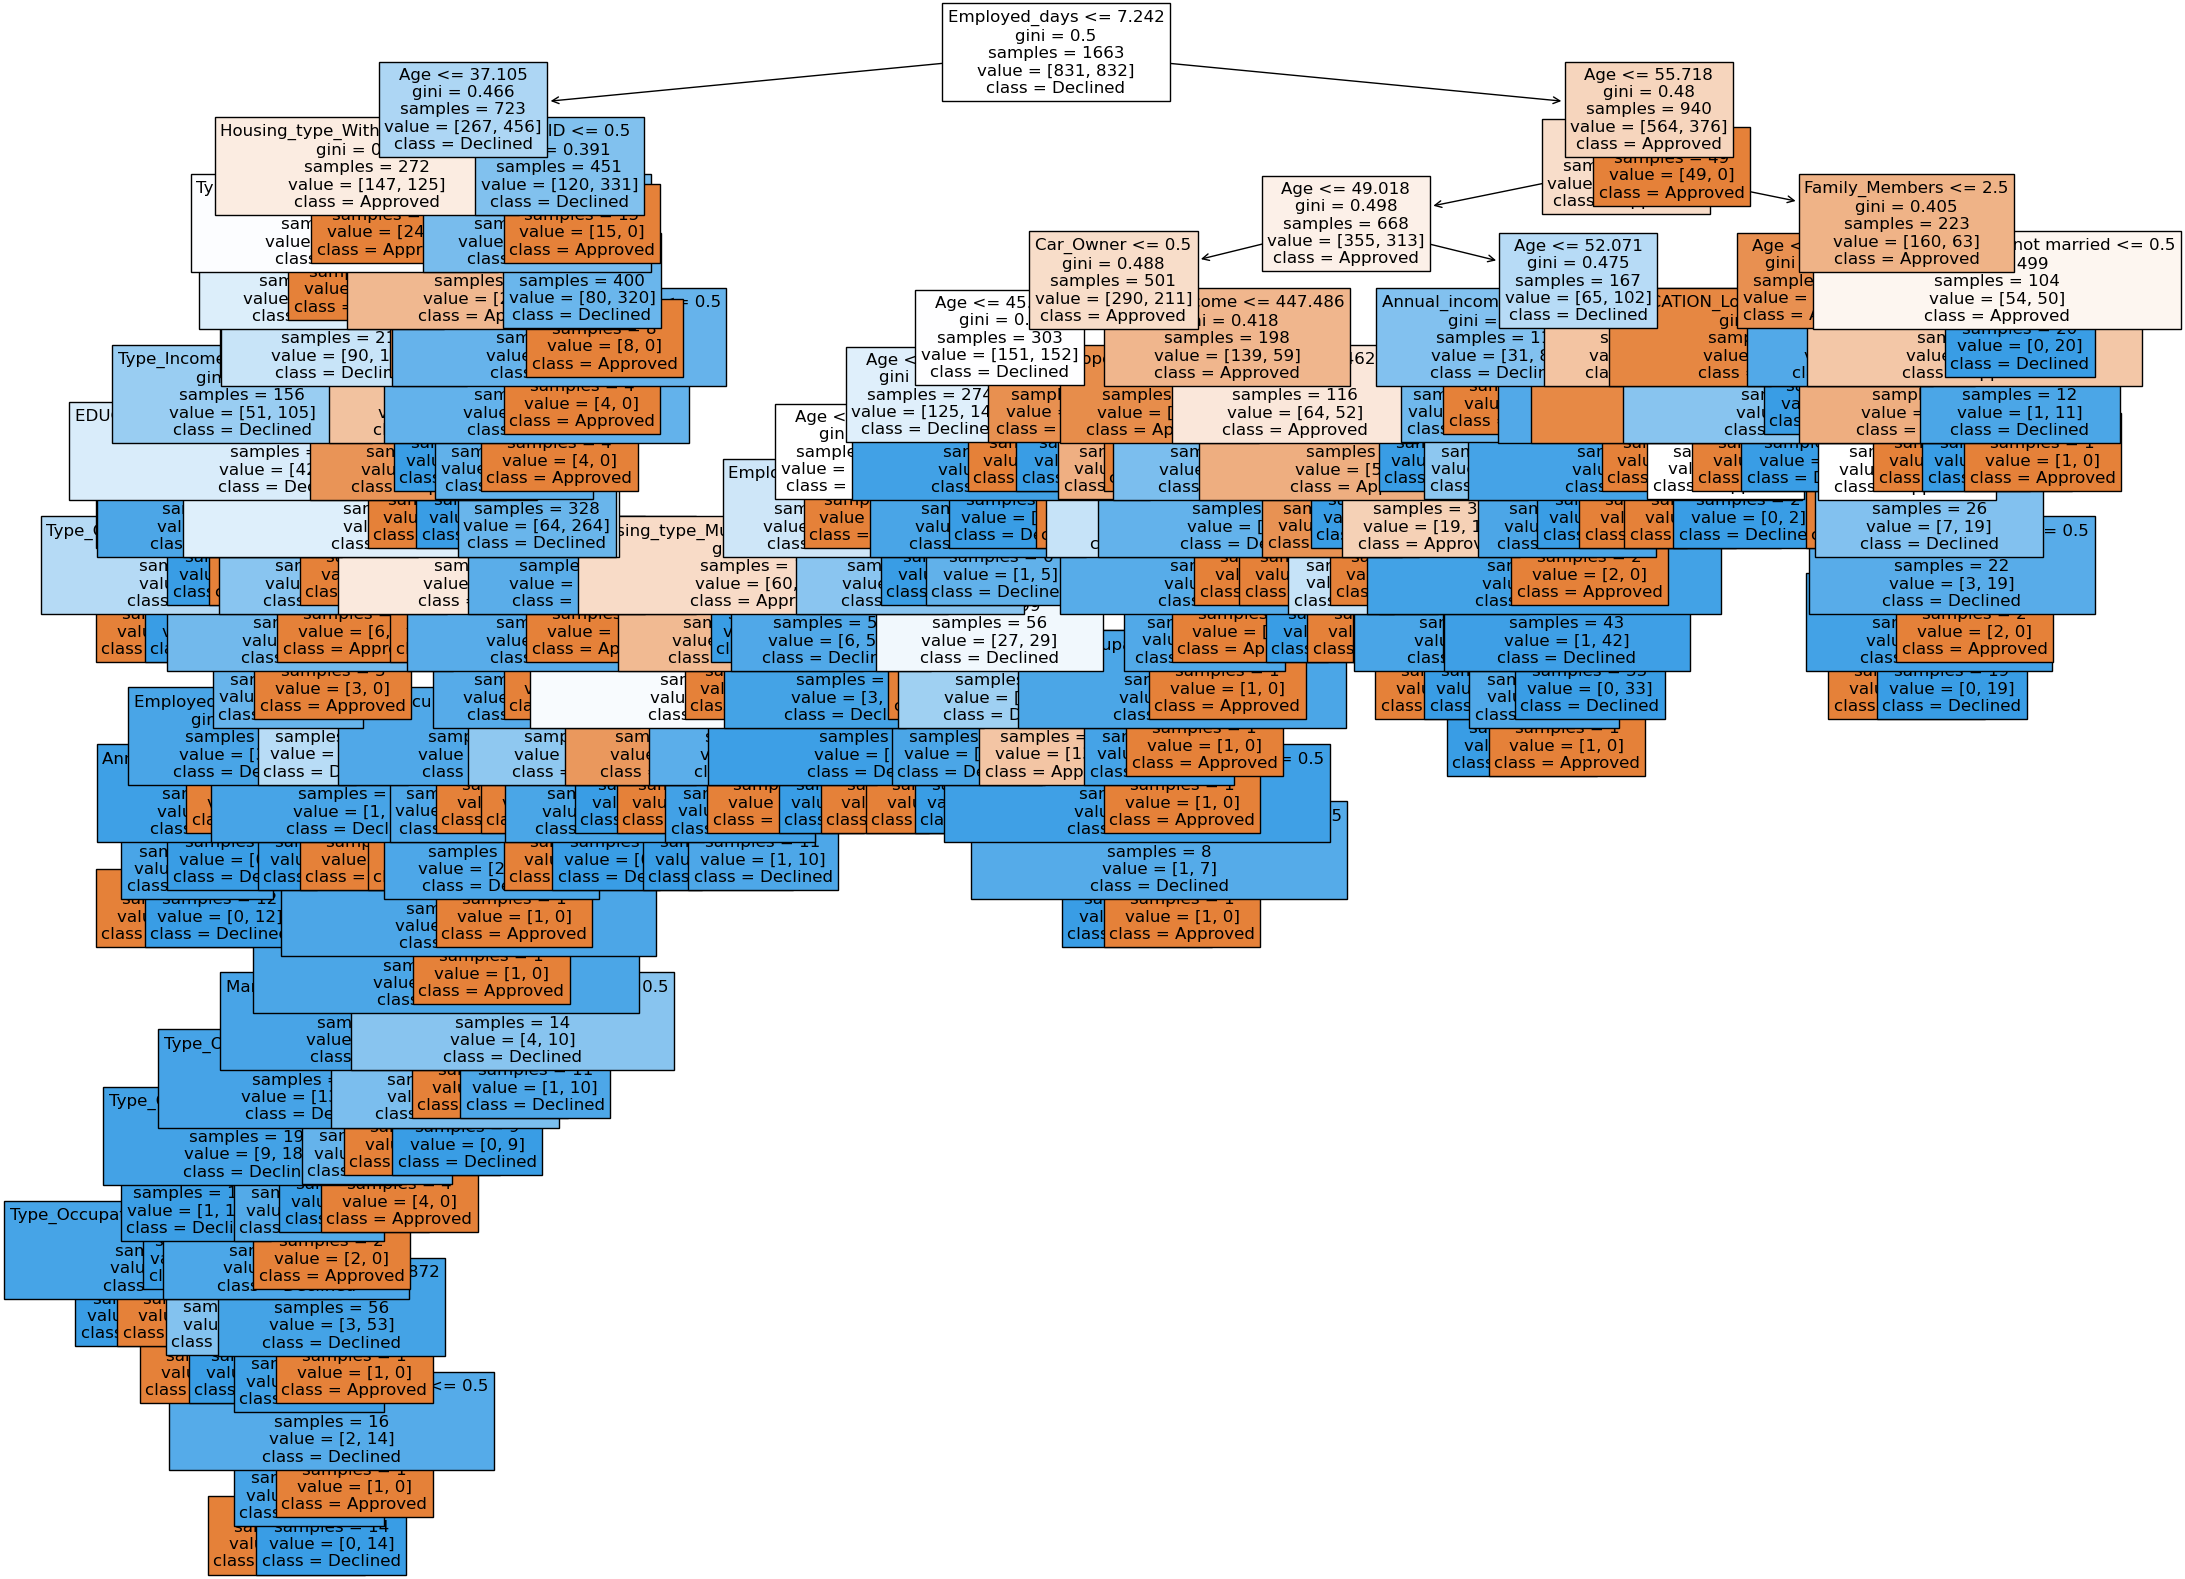

In [231]:
# Visualize the decison tree
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names={0:'Approved', 1:'Declined'},
                   filled=True,
                  fontsize=12)

In [ ]:
# Trying some methods to improve the decision tree

# Simplify features (Feature Selection)

In [44]:
# View feature importance
importance = clf.feature_importances_
features = X_train.columns

In [46]:
# create a dataframe for feature importance and sort it from higher to lower importance score 
# Displaying feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
print("Feature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))

Feature Importance:
                                    Feature  Importance
49                                      Age        0.28
5                             Employed_days        0.20
4                             Annual_income        0.08
7                                Work_Phone        0.03
10                           Family_Members        0.03
25                 Type_Occupation_Managers        0.03
9                                  EMAIL_ID        0.03
15              Type_Occupation_Accountants        0.03
14                      Type_Income_Working        0.03
11         Type_Income_Commercial associate        0.02
46              EDUCATION_Incomplete higher        0.02
41                 Marital_status_Separated        0.02
42      Marital_status_Single / not married        0.02
22                 Type_Occupation_IT staff        0.02
2                             Propert_Owner        0.02
38                Housing_type_With parents        0.02
35         Housing_type_Muni

In [48]:
# Select the top N important features
top_features = feature_importance.sort_values(by='Importance', ascending=False).head()['Feature']
print("Top Features:", top_features.tolist())

Top Features: ['Age', 'Employed_days', 'Annual_income', 'Work_Phone', 'Family_Members']


In [90]:
# Trying to cut off some features using threshold
threshold = 0.01
top_features = feature_importance[feature_importance['Importance'] >= threshold]

In [91]:
print("Selected Features based on Threshold:")
print(top_features)

Selected Features based on Threshold:
                                Feature  Importance
1                             Car_Owner        0.01
2                         Propert_Owner        0.02
4                         Annual_income        0.08
5                         Employed_days        0.20
7                            Work_Phone        0.03
8                                 Phone        0.01
9                              EMAIL_ID        0.03
10                       Family_Members        0.03
11     Type_Income_Commercial associate        0.02
13            Type_Income_State servant        0.01
14                  Type_Income_Working        0.03
15          Type_Occupation_Accountants        0.03
18           Type_Occupation_Core staff        0.01
22             Type_Occupation_IT staff        0.02
25             Type_Occupation_Managers        0.03
35     Housing_type_Municipal apartment        0.02
38            Housing_type_With parents        0.02
41             Marital_sta

In [92]:
# Get column names of the top features
top_columns = top_features['Feature'].tolist()
print("Top Columns:", top_columns)

Top Columns: ['Car_Owner', 'Propert_Owner', 'Annual_income', 'Employed_days', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'Type_Income_Commercial associate', 'Type_Income_State servant', 'Type_Income_Working', 'Type_Occupation_Accountants', 'Type_Occupation_Core staff', 'Type_Occupation_IT staff', 'Type_Occupation_Managers', 'Housing_type_Municipal apartment', 'Housing_type_With parents', 'Marital_status_Separated', 'Marital_status_Single / not married', 'EDUCATION_Incomplete higher', 'Age']


In [93]:
# Select the columns from X_train and X_test based on the top features
X_train_top = X_train[top_columns]
X_test_top = X_test[top_columns]

X_train_top.head()


Car_Owner  Propert_Owner  Annual_income  Employed_days  Work_Phone  \
1531          0              1         424.26           8.16           1   
2058          1              0         437.49           6.41           0   
244           0              0         519.62           7.45           1   
1165          1              1         424.26           7.96           0   
22            1              0         367.42           5.95           1   

      Phone  EMAIL_ID  Family_Members  Type_Income_Commercial associate  \
1531      0         0               3                             False   
2058      1         1               1                              True   
244       1         0               2                             False   
1165      1         1               4                              True   
22        0         0               3                             False   

      Type_Income_State servant  ...  Type_Occupation_Accountants  \
1531                      False  ...                        False   
2058                      False  ...                        False   
244                       False  ...                        False   
1165                      False  ...                        False   
22                        False  ...                        False   

      Type_Occupation_Core staff  Type_Occupation_IT staff  \
1531                       False                     False   
2058                       False                     False   
244                        False                     False   
1165                       False                     False   
22                         False                     False   

      Type_Occupation_Managers  Housing_type_Municipal apartment  \
1531                     False                             False   
2058                     False                              True   
244                      False                             False   
1165                     False                             False   
22                       False                             False   

      Housing_type_With parents  Marital_status_Separated  \
1531                      False                      True   
2058                      False                     False   
244                       False                     False   
1165                      False                     False   
22                        False                     False   

      Marital_status_Single / not married  EDUCATION_Incomplete higher   Age  
1531                                False                         True 33.57  
2058                                 True                        False 31.58  
244                                 False                        False 48.71  
1165                                False                        False 32.11  
22                                  False                        False 43.70  

[5 rows x 21 columns]

In [94]:
#Trying the model again with top important features
clf=DecisionTreeClassifier()

In [95]:
clf.fit(X_train_top,y_train)

DecisionTreeClassifier()

In [96]:
y_predict=clf.predict(X_test_top)

In [97]:
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_predict))

Accuracy: 0.94

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       278
           1       0.89      1.00      0.94       277

    accuracy                           0.94       555
   macro avg       0.95      0.94      0.94       555
weighted avg       0.95      0.94      0.94       555



In [196]:
confusion_matrix(y_test, y_predict, labels=[0,1])

array([[245,  33],
       [  0, 277]], dtype=int64)

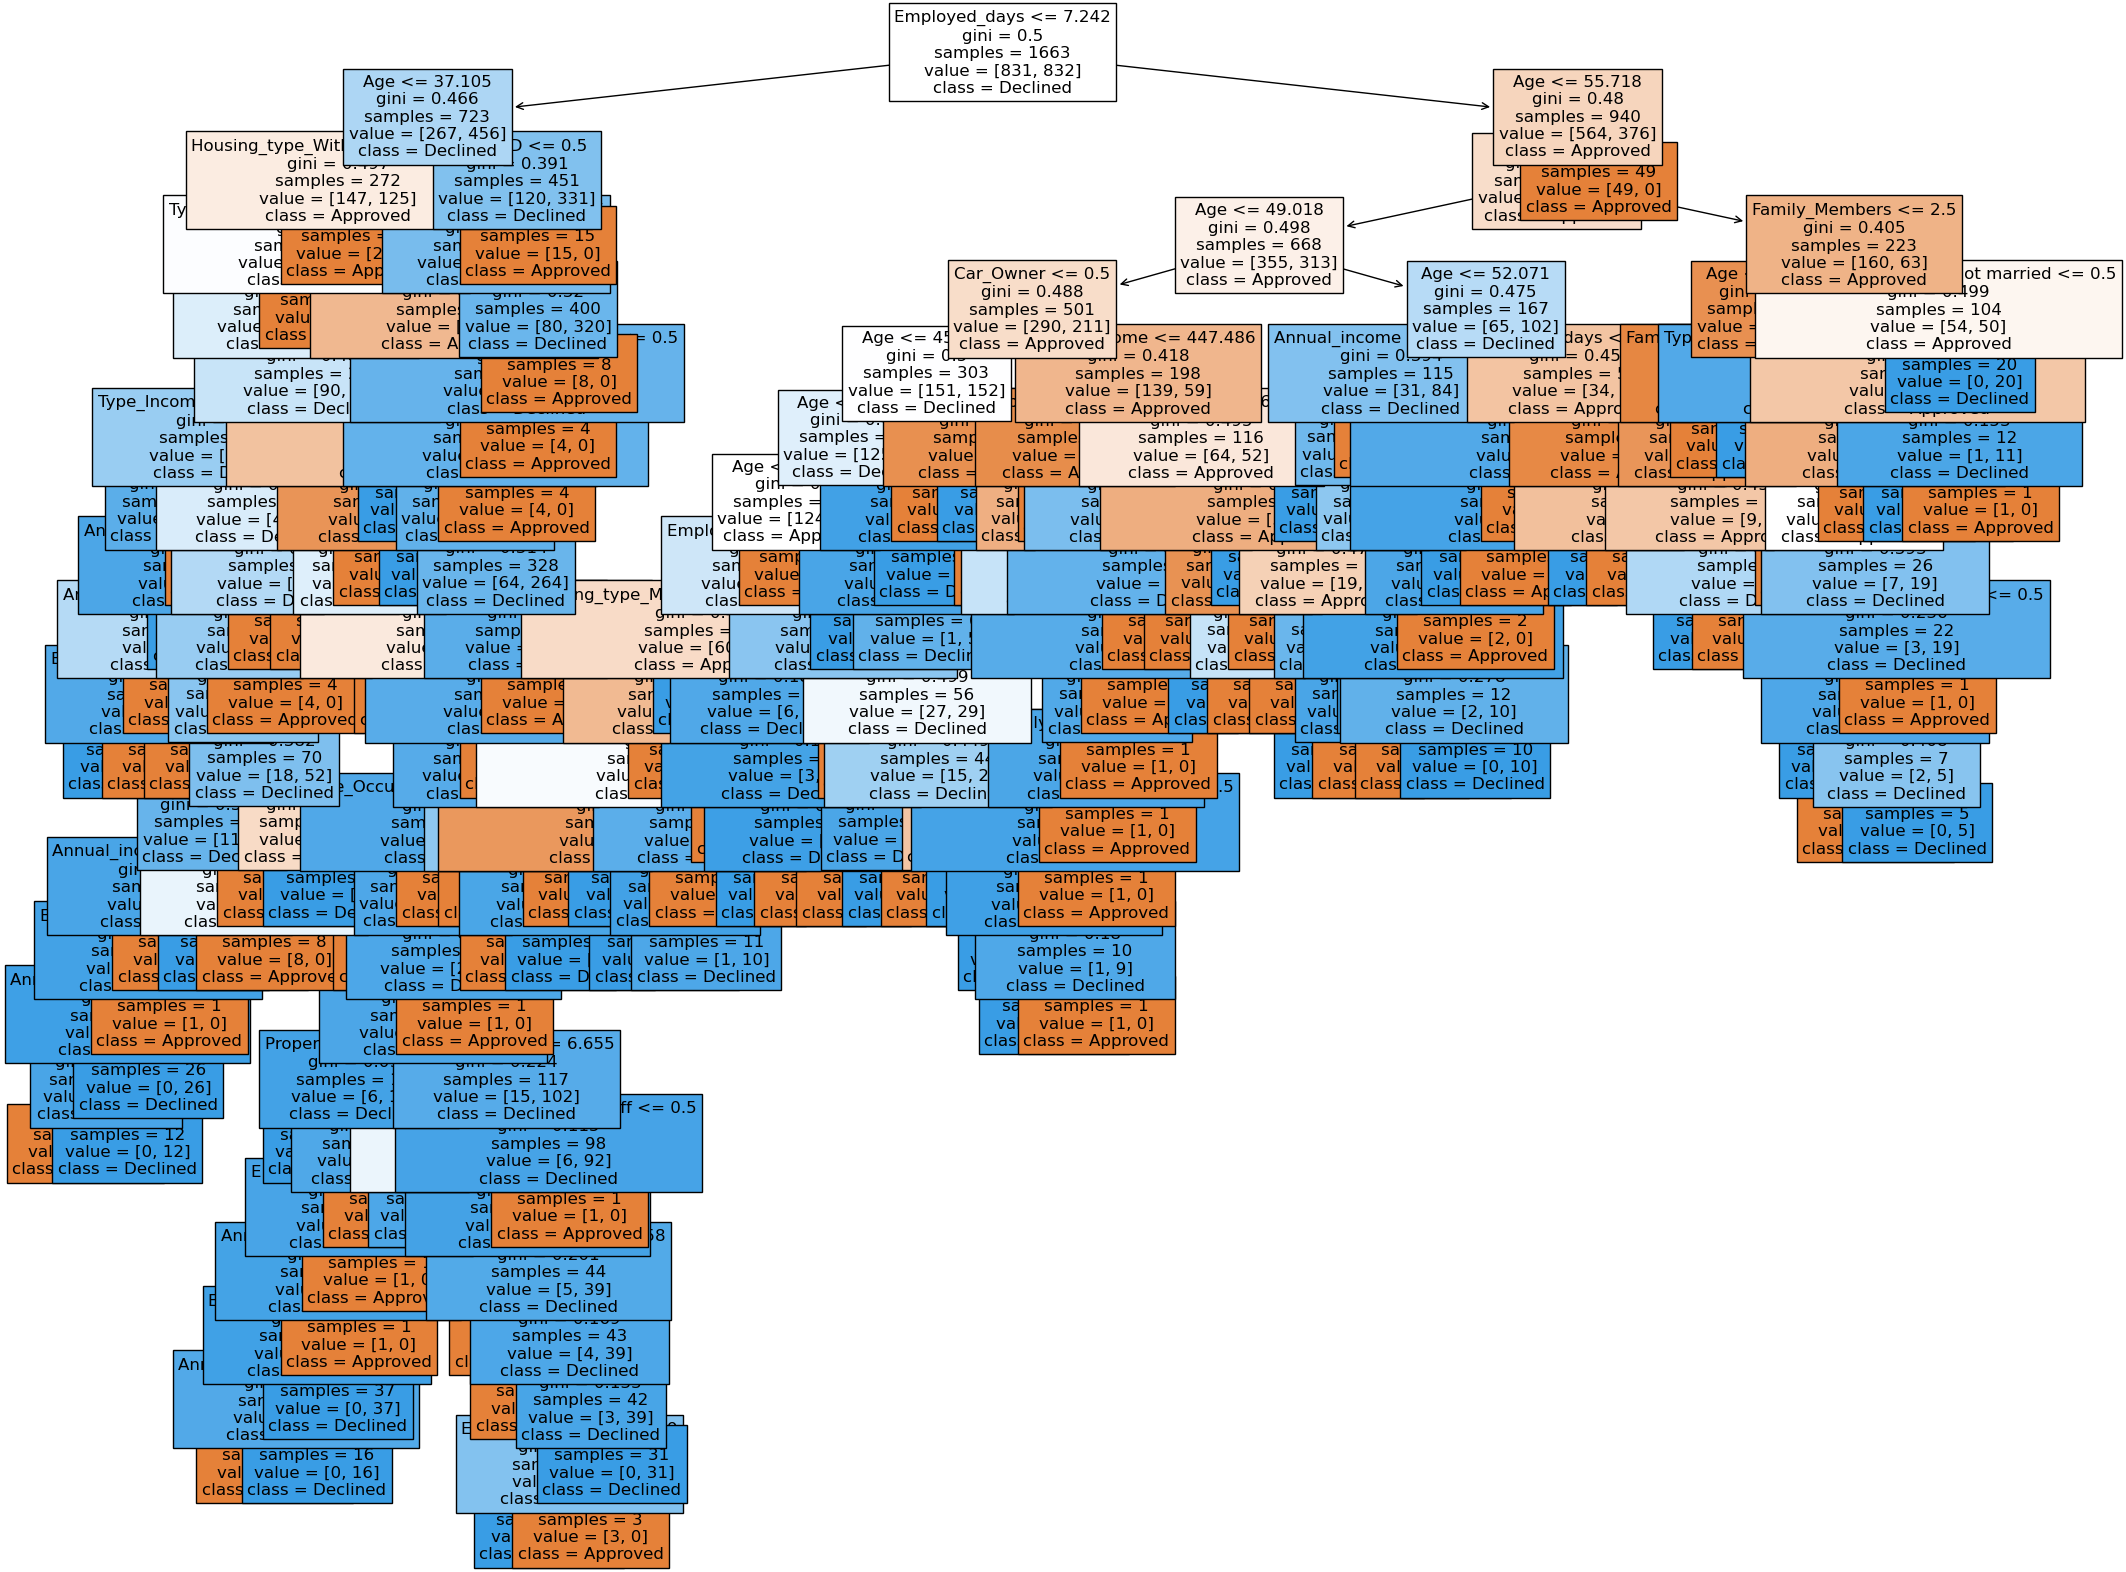

In [98]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=top_columns,  
                   class_names={0:'Approved', 1:'Declined'},
                   filled=True,
                  fontsize=12)

In [ ]:
#Still there is overfittng on the decision tree so we will try to change some hyperparameters

# Trying to change some hyperparameters randomly to check if accuracy will change or not 

In [53]:
clf2=DecisionTreeClassifier(max_depth=4,min_samples_split=10,min_samples_leaf=5,random_state=42)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [199]:
y_pred2=clf2.predict(X_test)

In [201]:
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred2))
#It looks like the accuracy going way down 

Accuracy: 0.63

Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       278
           1       0.64      0.61      0.62       277

    accuracy                           0.63       555
   macro avg       0.63      0.63      0.63       555
weighted avg       0.63      0.63      0.63       555



In [202]:
confusion_matrix(y_test, y_pred2, labels=[0,1])

array([[182,  96],
       [108, 169]], dtype=int64)

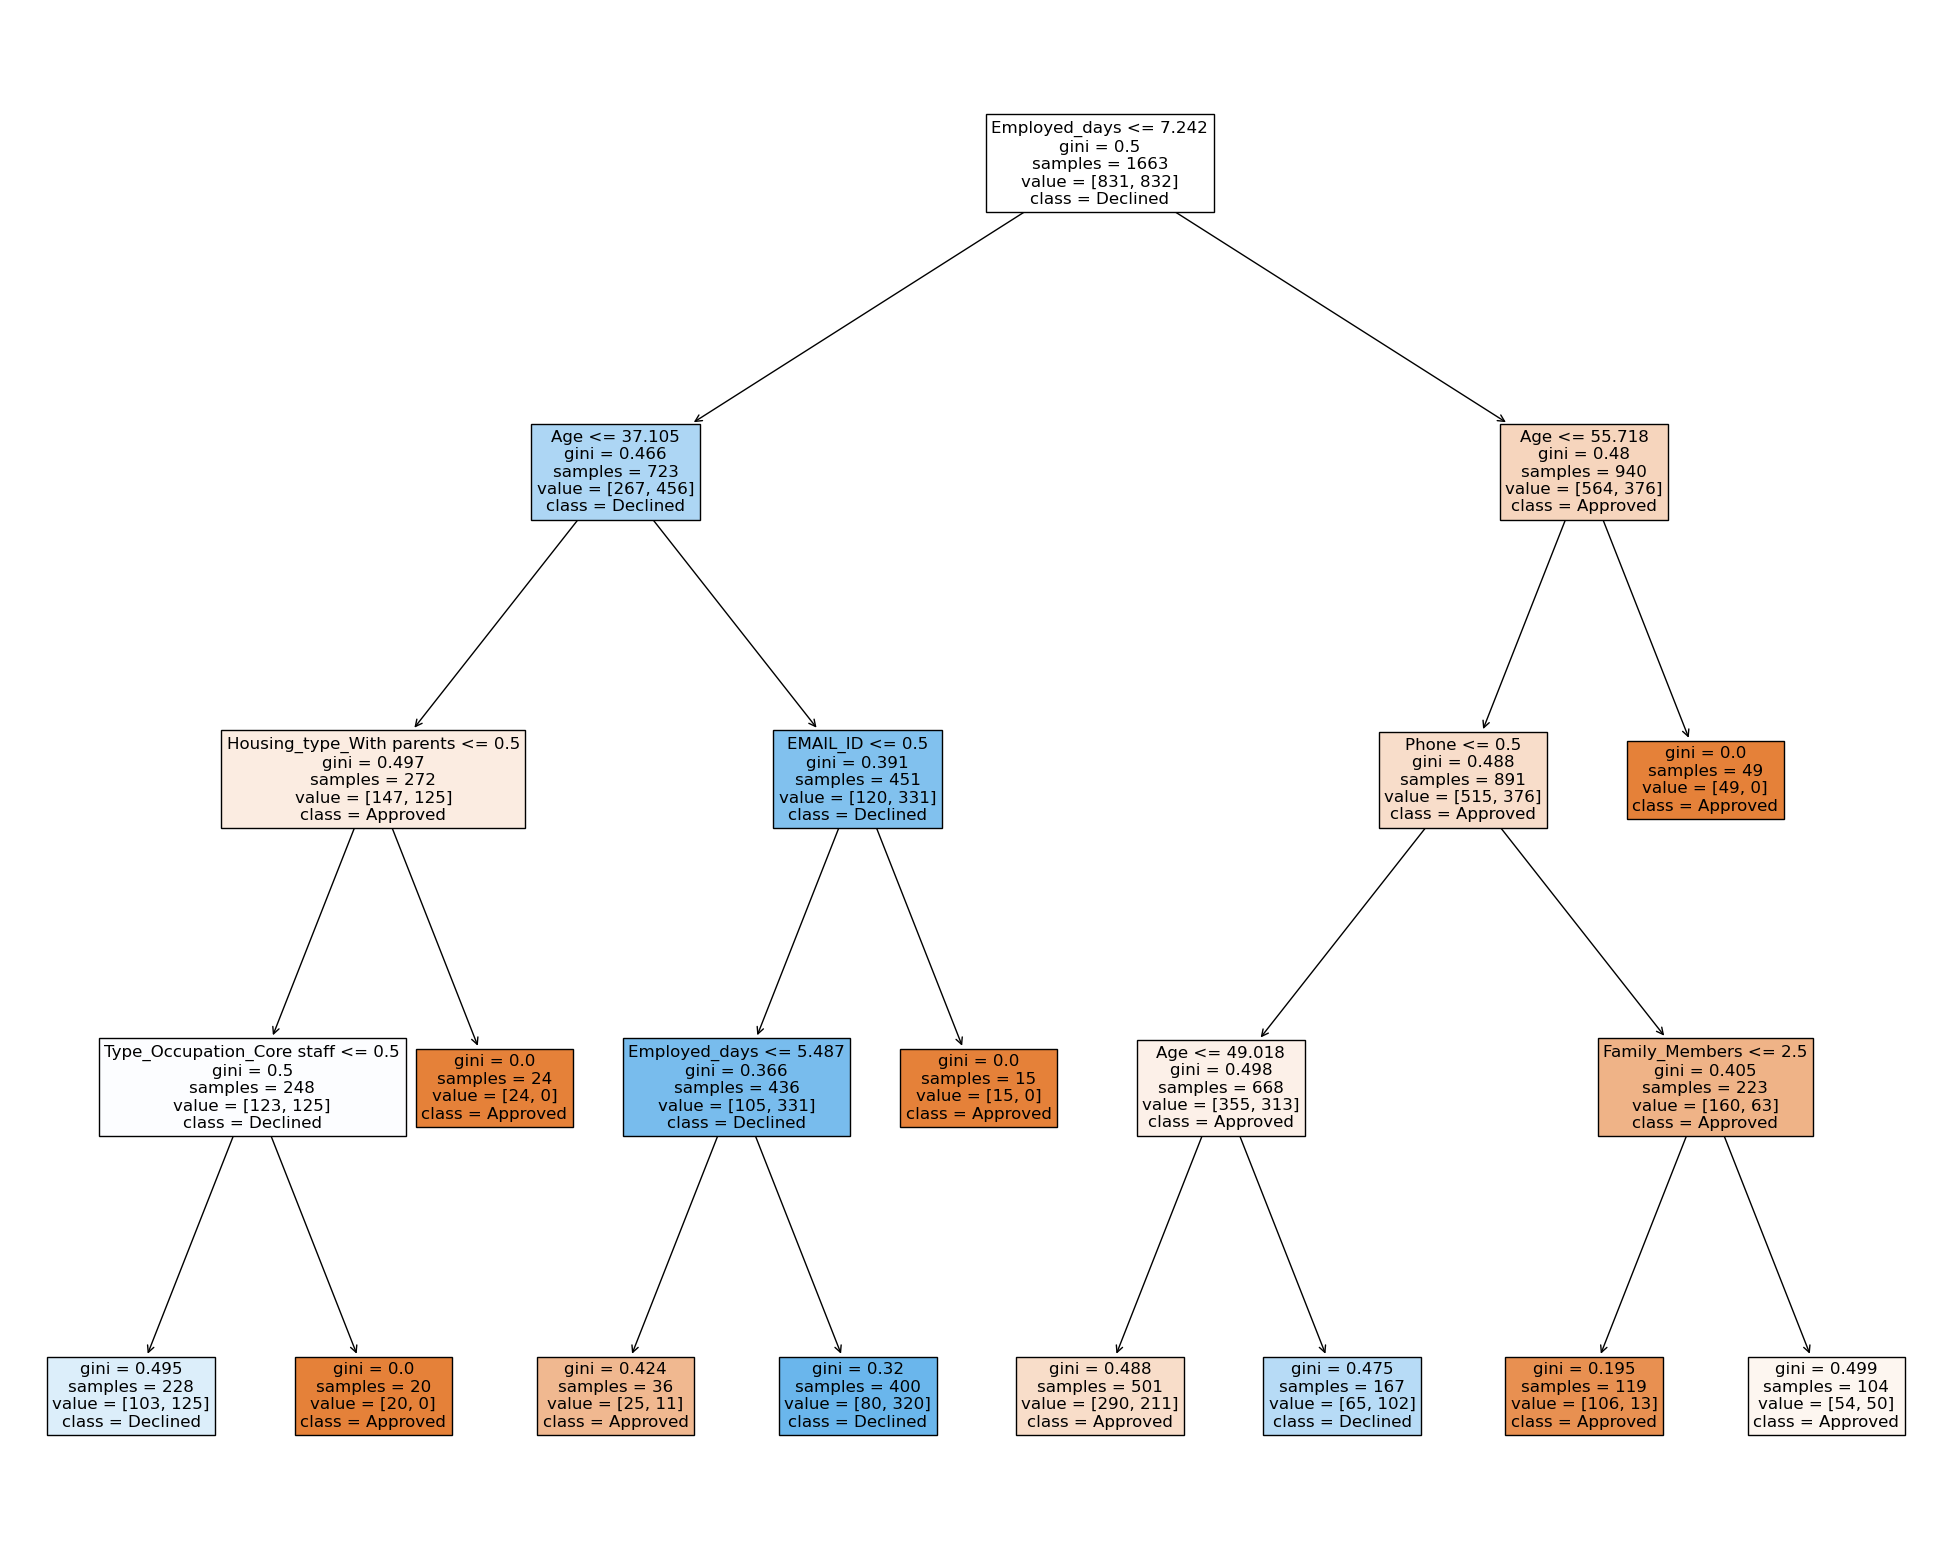

In [56]:
fig = plt.figure(figsize=(25,20))
tree3 = tree.plot_tree(clf2, 
                   feature_names=feature_names,  
                   class_names={0:'Approved', 1:'Declined'},
                   filled=True,
                  fontsize=12)

In [ ]:
# So when the accuracy was high the decision tree wasnot understadable and there was overfitting
# After changing some hyperparameter when the accuracy was low but  the decision tree was understadable 

# Trying GridSearch CV

In [ ]:
# Try Grid Search: this algo is to give him some hyperparameters and ot gives you best parameters to use 

In [105]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [110]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

In [111]:
#Fit the Model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [112]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Best Accuracy: 0.8574713267484352


In [114]:
#Trying the model again after grid search 
clf3=DecisionTreeClassifier(criterion='gini', max_depth= 10,min_samples_split= 5)
clf3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [205]:
y_pred3=clf3.predict(X_test)

In [206]:
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred3))
#Accuracy higher than random one 

Accuracy: 0.87

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       278
           1       0.81      0.96      0.88       277

    accuracy                           0.87       555
   macro avg       0.88      0.87      0.87       555
weighted avg       0.88      0.87      0.87       555



In [207]:
confusion_matrix(y_test, y_pred3, labels=[0,1])

array([[216,  62],
       [ 11, 266]], dtype=int64)

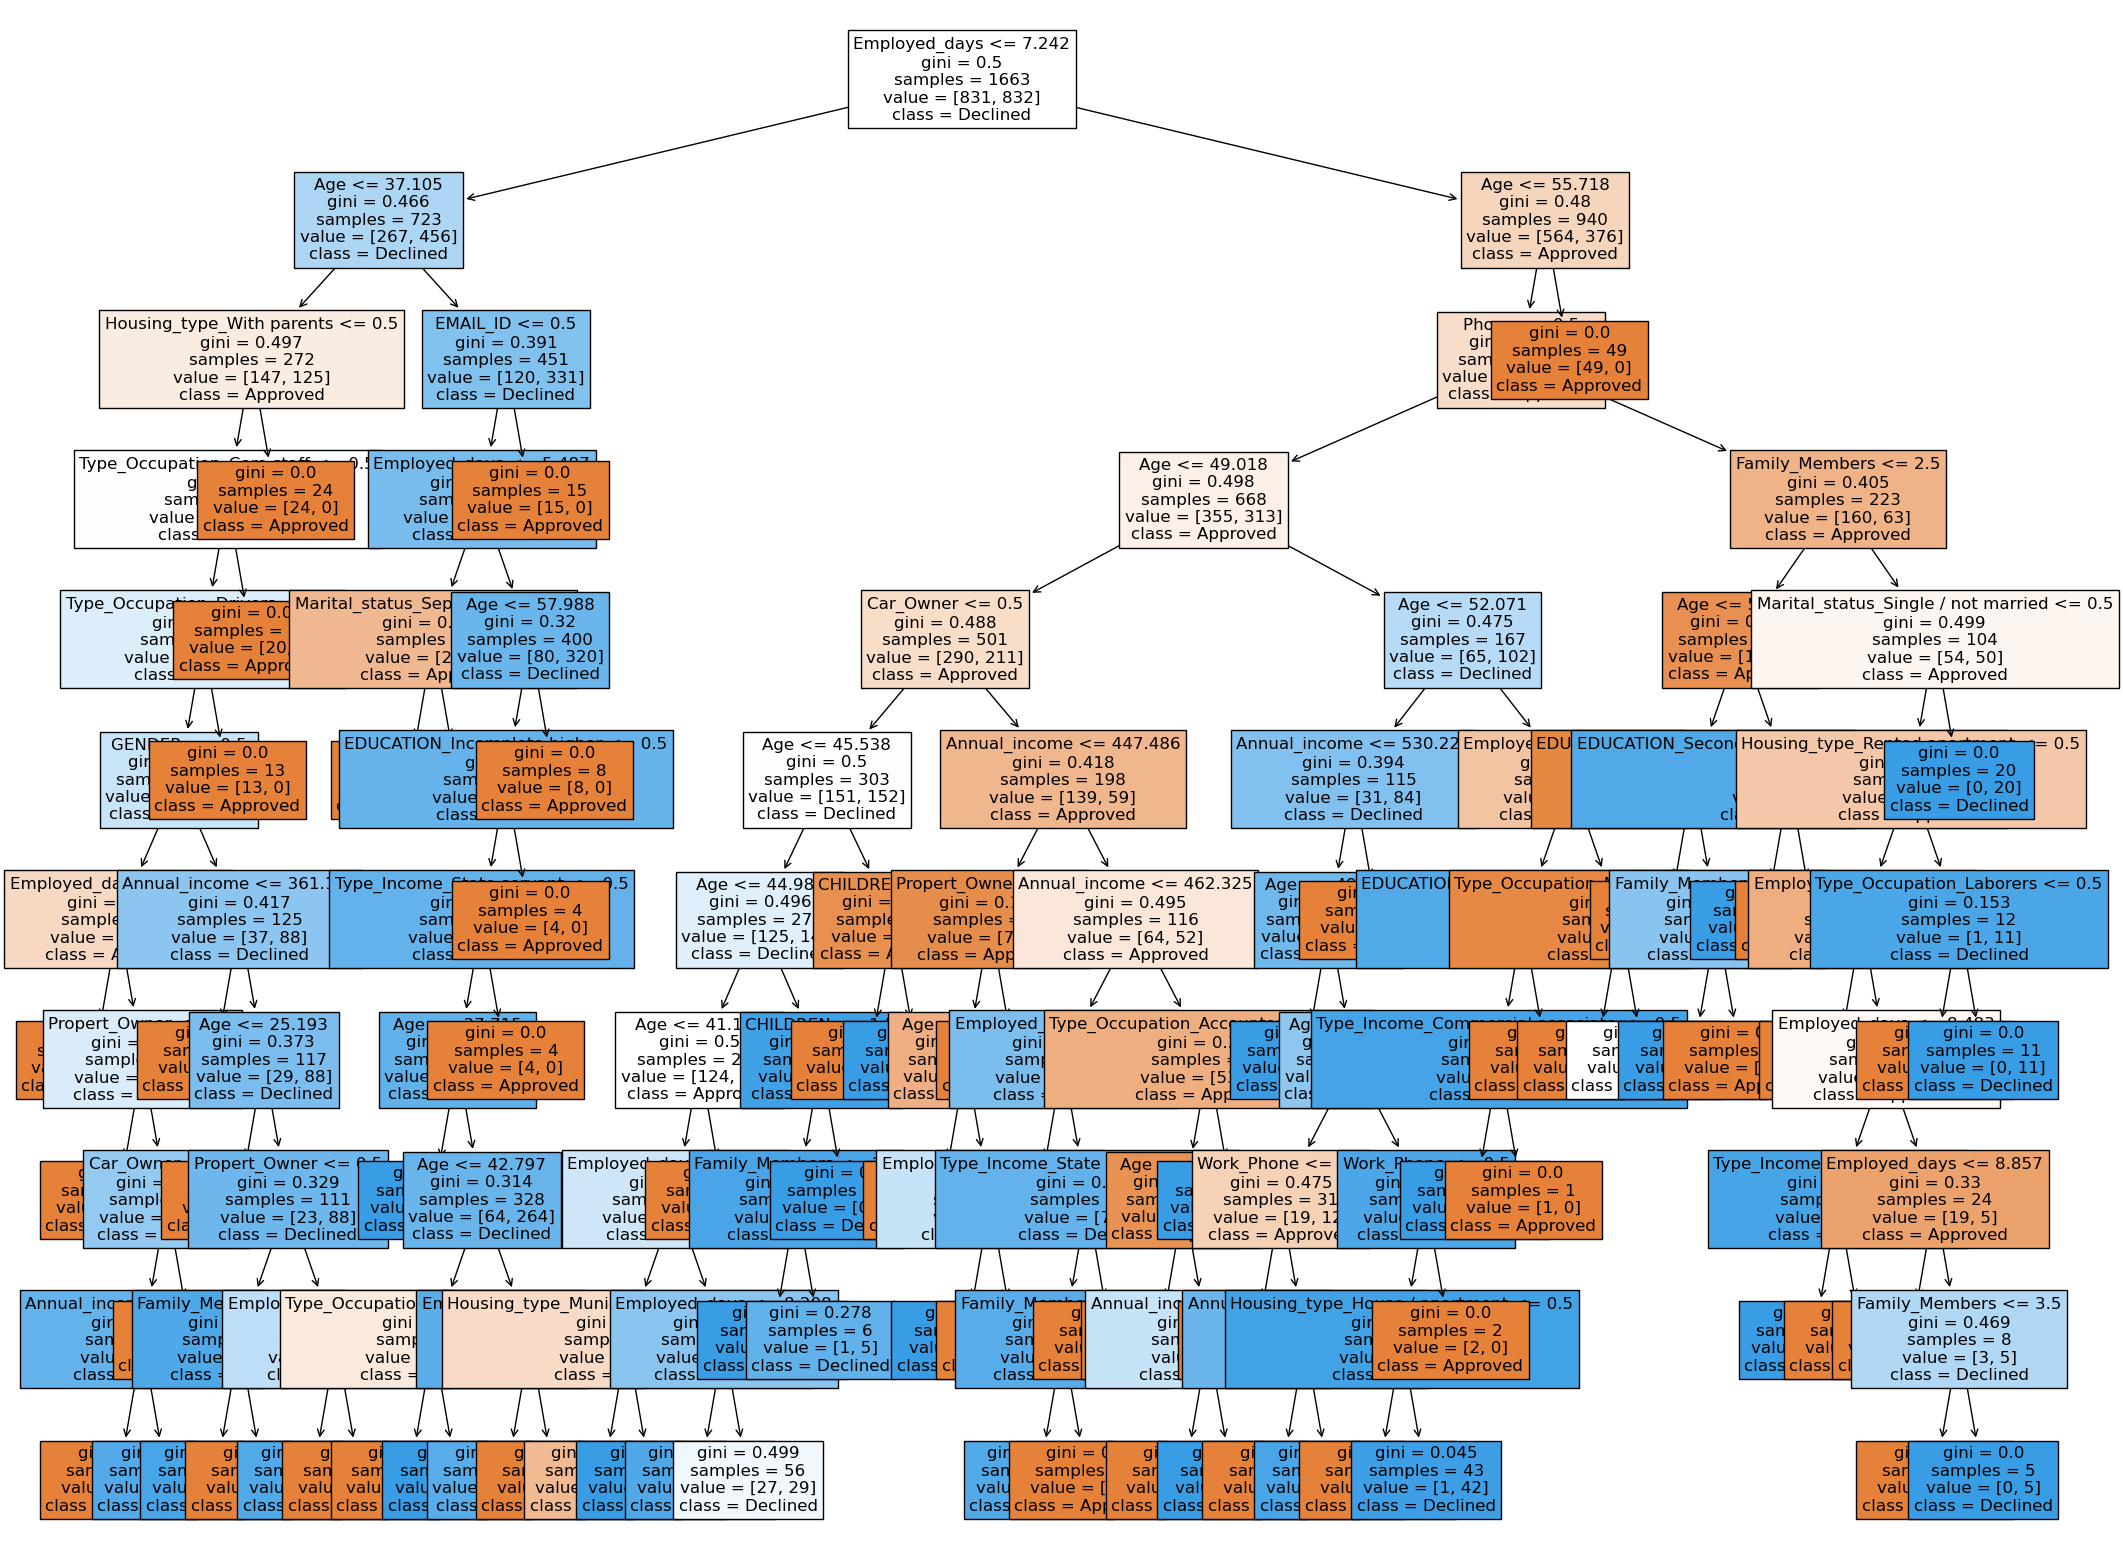

In [119]:
fig = plt.figure(figsize=(25,20))
tree3 = tree.plot_tree(clf3, 
                   feature_names=feature_names,  
                   class_names={0:'Approved', 1:'Declined'},
                   filled=True,
                  fontsize=12)

In [ ]:
#Still there is good accracy but overfitting in the tree

# Prune the Tree Using ccp_alpha

In [ ]:
#This method Prune the tree using cost complexity pruning. It removes unnecessary splits to improve readability.

In [120]:
# Get the cost complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [121]:
# Find the optimal alpha value
print("Cost Complexity Pruning Path:")
for alpha, impurity in zip(ccp_alphas, impurities):
    print(f"Alpha: {alpha:.5f}, Total Impurity: {impurity:.5f}")

Cost Complexity Pruning Path:
Alpha: 0.00000, Total Impurity: 0.00422
Alpha: 0.00006, Total Impurity: 0.00428
Alpha: 0.00008, Total Impurity: 0.00443
Alpha: 0.00012, Total Impurity: 0.00456
Alpha: 0.00058, Total Impurity: 0.00572
Alpha: 0.00059, Total Impurity: 0.00690
Alpha: 0.00059, Total Impurity: 0.00808
Alpha: 0.00060, Total Impurity: 0.00928
Alpha: 0.00077, Total Impurity: 0.01159
Alpha: 0.00101, Total Impurity: 0.01565
Alpha: 0.00107, Total Impurity: 0.01779
Alpha: 0.00107, Total Impurity: 0.01886
Alpha: 0.00110, Total Impurity: 0.01995
Alpha: 0.00110, Total Impurity: 0.02105
Alpha: 0.00111, Total Impurity: 0.02216
Alpha: 0.00112, Total Impurity: 0.02329
Alpha: 0.00112, Total Impurity: 0.02441
Alpha: 0.00113, Total Impurity: 0.02667
Alpha: 0.00113, Total Impurity: 0.02893
Alpha: 0.00114, Total Impurity: 0.03122
Alpha: 0.00118, Total Impurity: 0.03240
Alpha: 0.00143, Total Impurity: 0.03811
Alpha: 0.00152, Total Impurity: 0.05176
Alpha: 0.00172, Total Impurity: 0.05348
Alpha: 0.0

In [232]:
# Train pruned trees for a range of alpha values
best_alpha = 0.00751 
clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_pruned.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.00751, random_state=42)

In [233]:
y_pred4=clf_pruned.predict(X_test)

In [234]:
accuracy = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred4))
#Low accuracy

Accuracy: 0.61

Classification Report:

              precision    recall  f1-score   support

           0       0.57      0.85      0.69       278
           1       0.71      0.37      0.48       277

    accuracy                           0.61       555
   macro avg       0.64      0.61      0.58       555
weighted avg       0.64      0.61      0.58       555



In [210]:
confusion_matrix(y_test, y_pred4, labels=[0,1])

array([[236,  42],
       [175, 102]], dtype=int64)

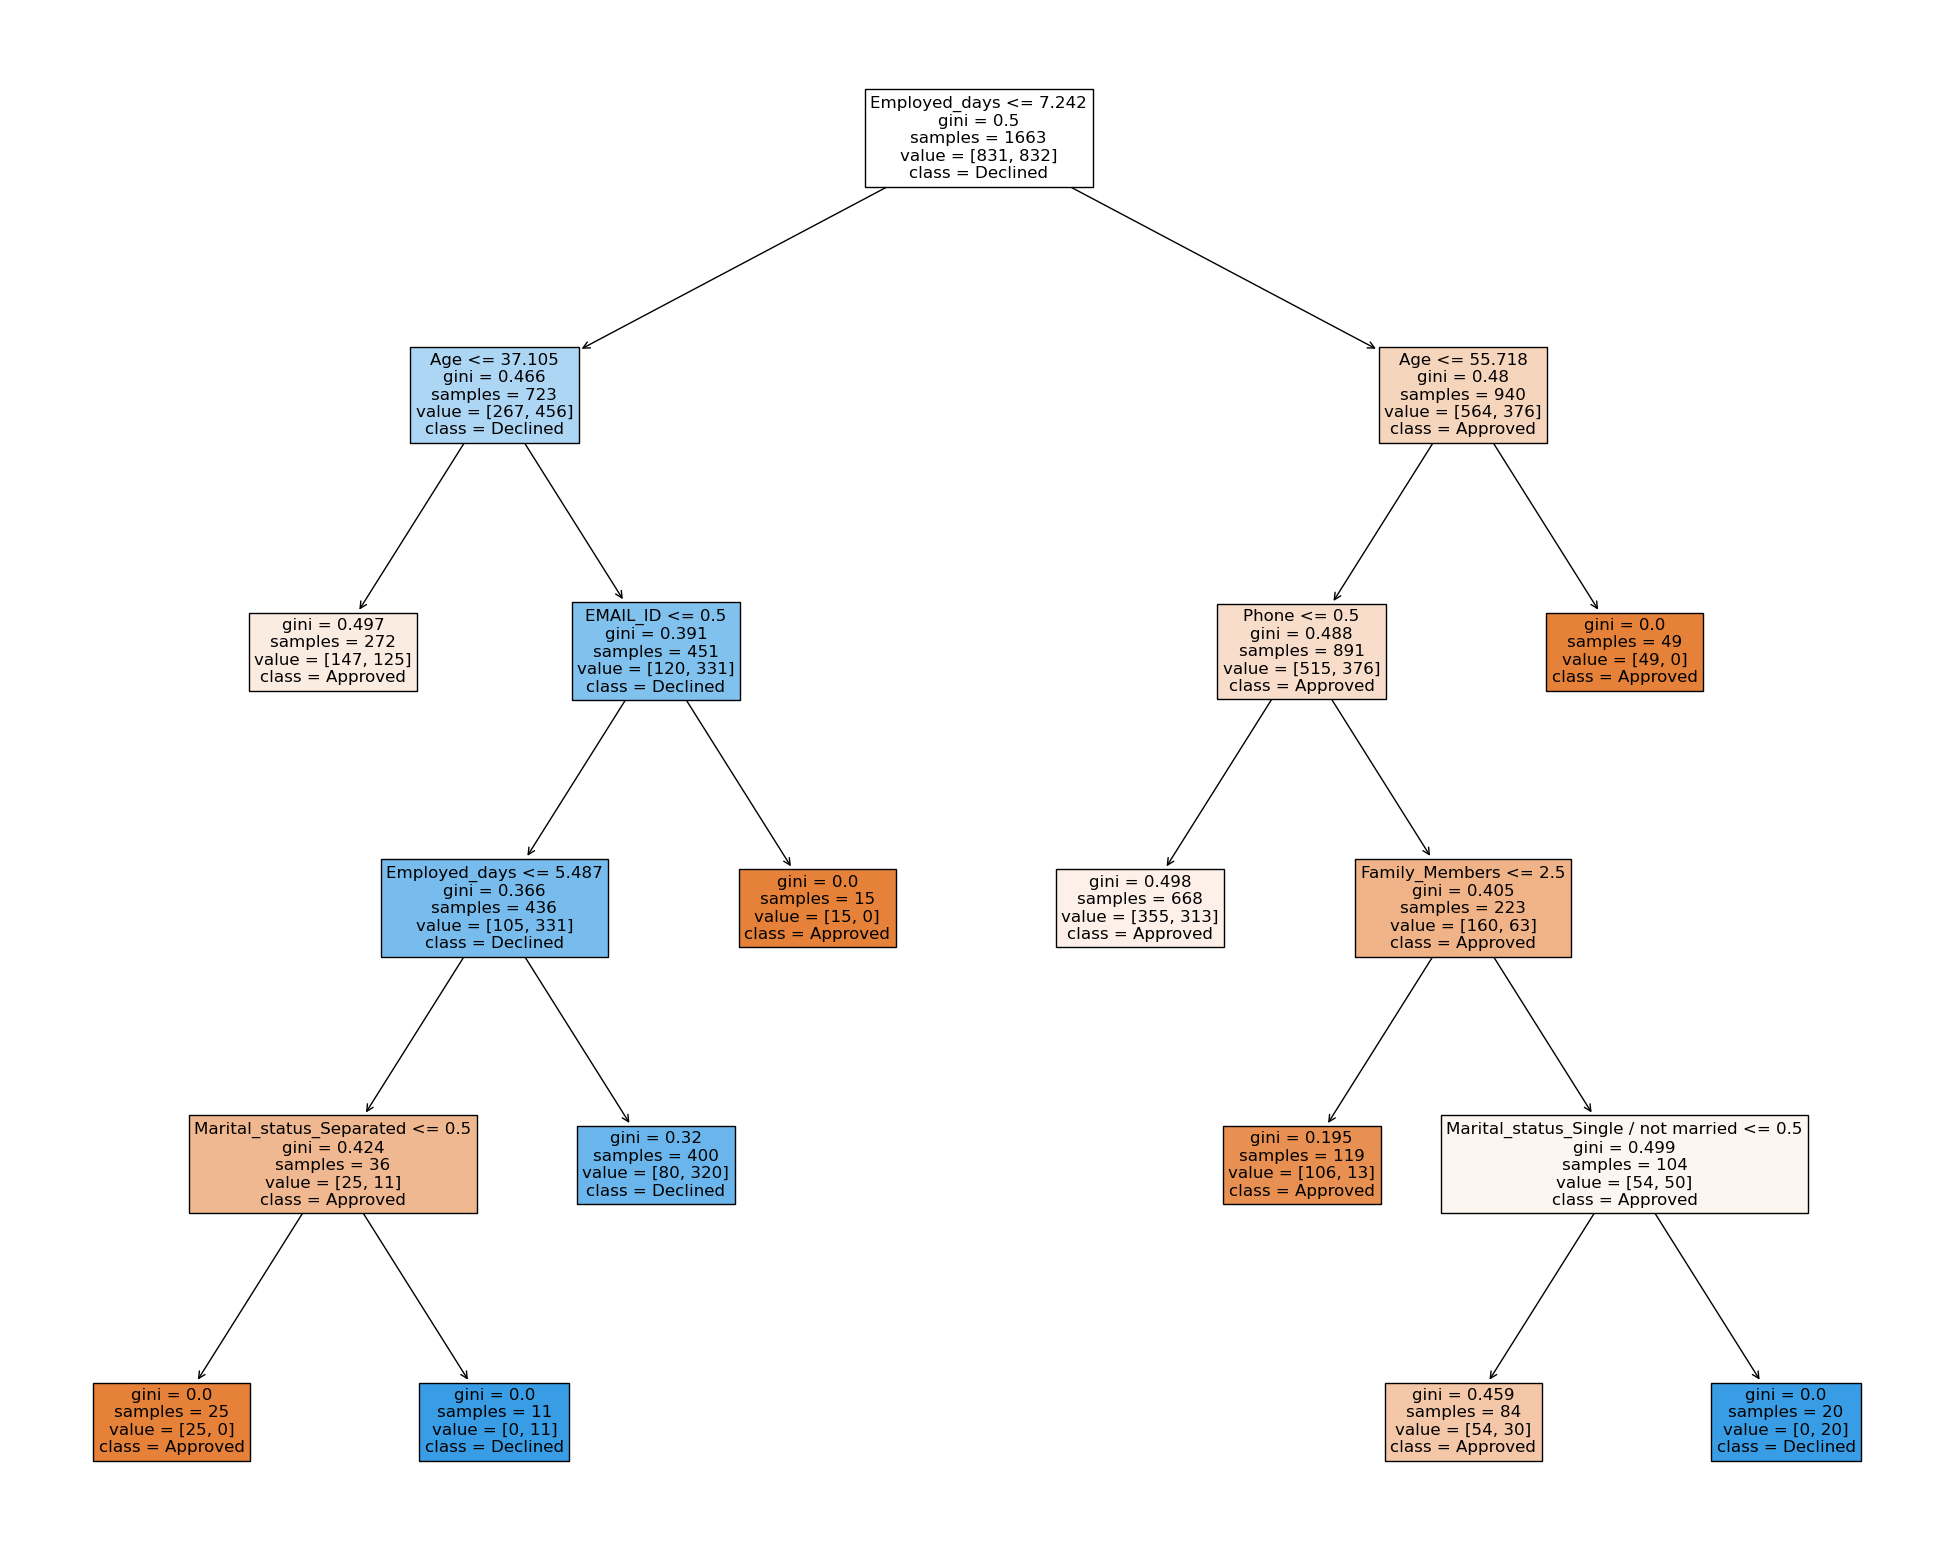

In [190]:
fig = plt.figure(figsize=(25,20))
tree3 = tree.plot_tree(clf_pruned, 
                   feature_names=feature_names,  
                   class_names={0:'Approved', 1:'Declined'},
                   filled=True,
                  fontsize=12)
#But understandable tree 

# Trying another decision tree model (Random Forest)

In [183]:
model=RandomForestClassifier(random_state=42)

In [184]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [211]:
y_pred5=model.predict(X_test)

In [212]:
accuracy = accuracy_score(y_test, y_pred5)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred5))

Accuracy: 0.99

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       278
           1       0.98      1.00      0.99       277

    accuracy                           0.99       555
   macro avg       0.99      0.99      0.99       555
weighted avg       0.99      0.99      0.99       555



In [214]:
confusion_matrix(y_test, y_pred5, labels=[0,1])

array([[272,   6],
       [  0, 277]], dtype=int64)

In [187]:
individual_tree = model.estimators_[1]

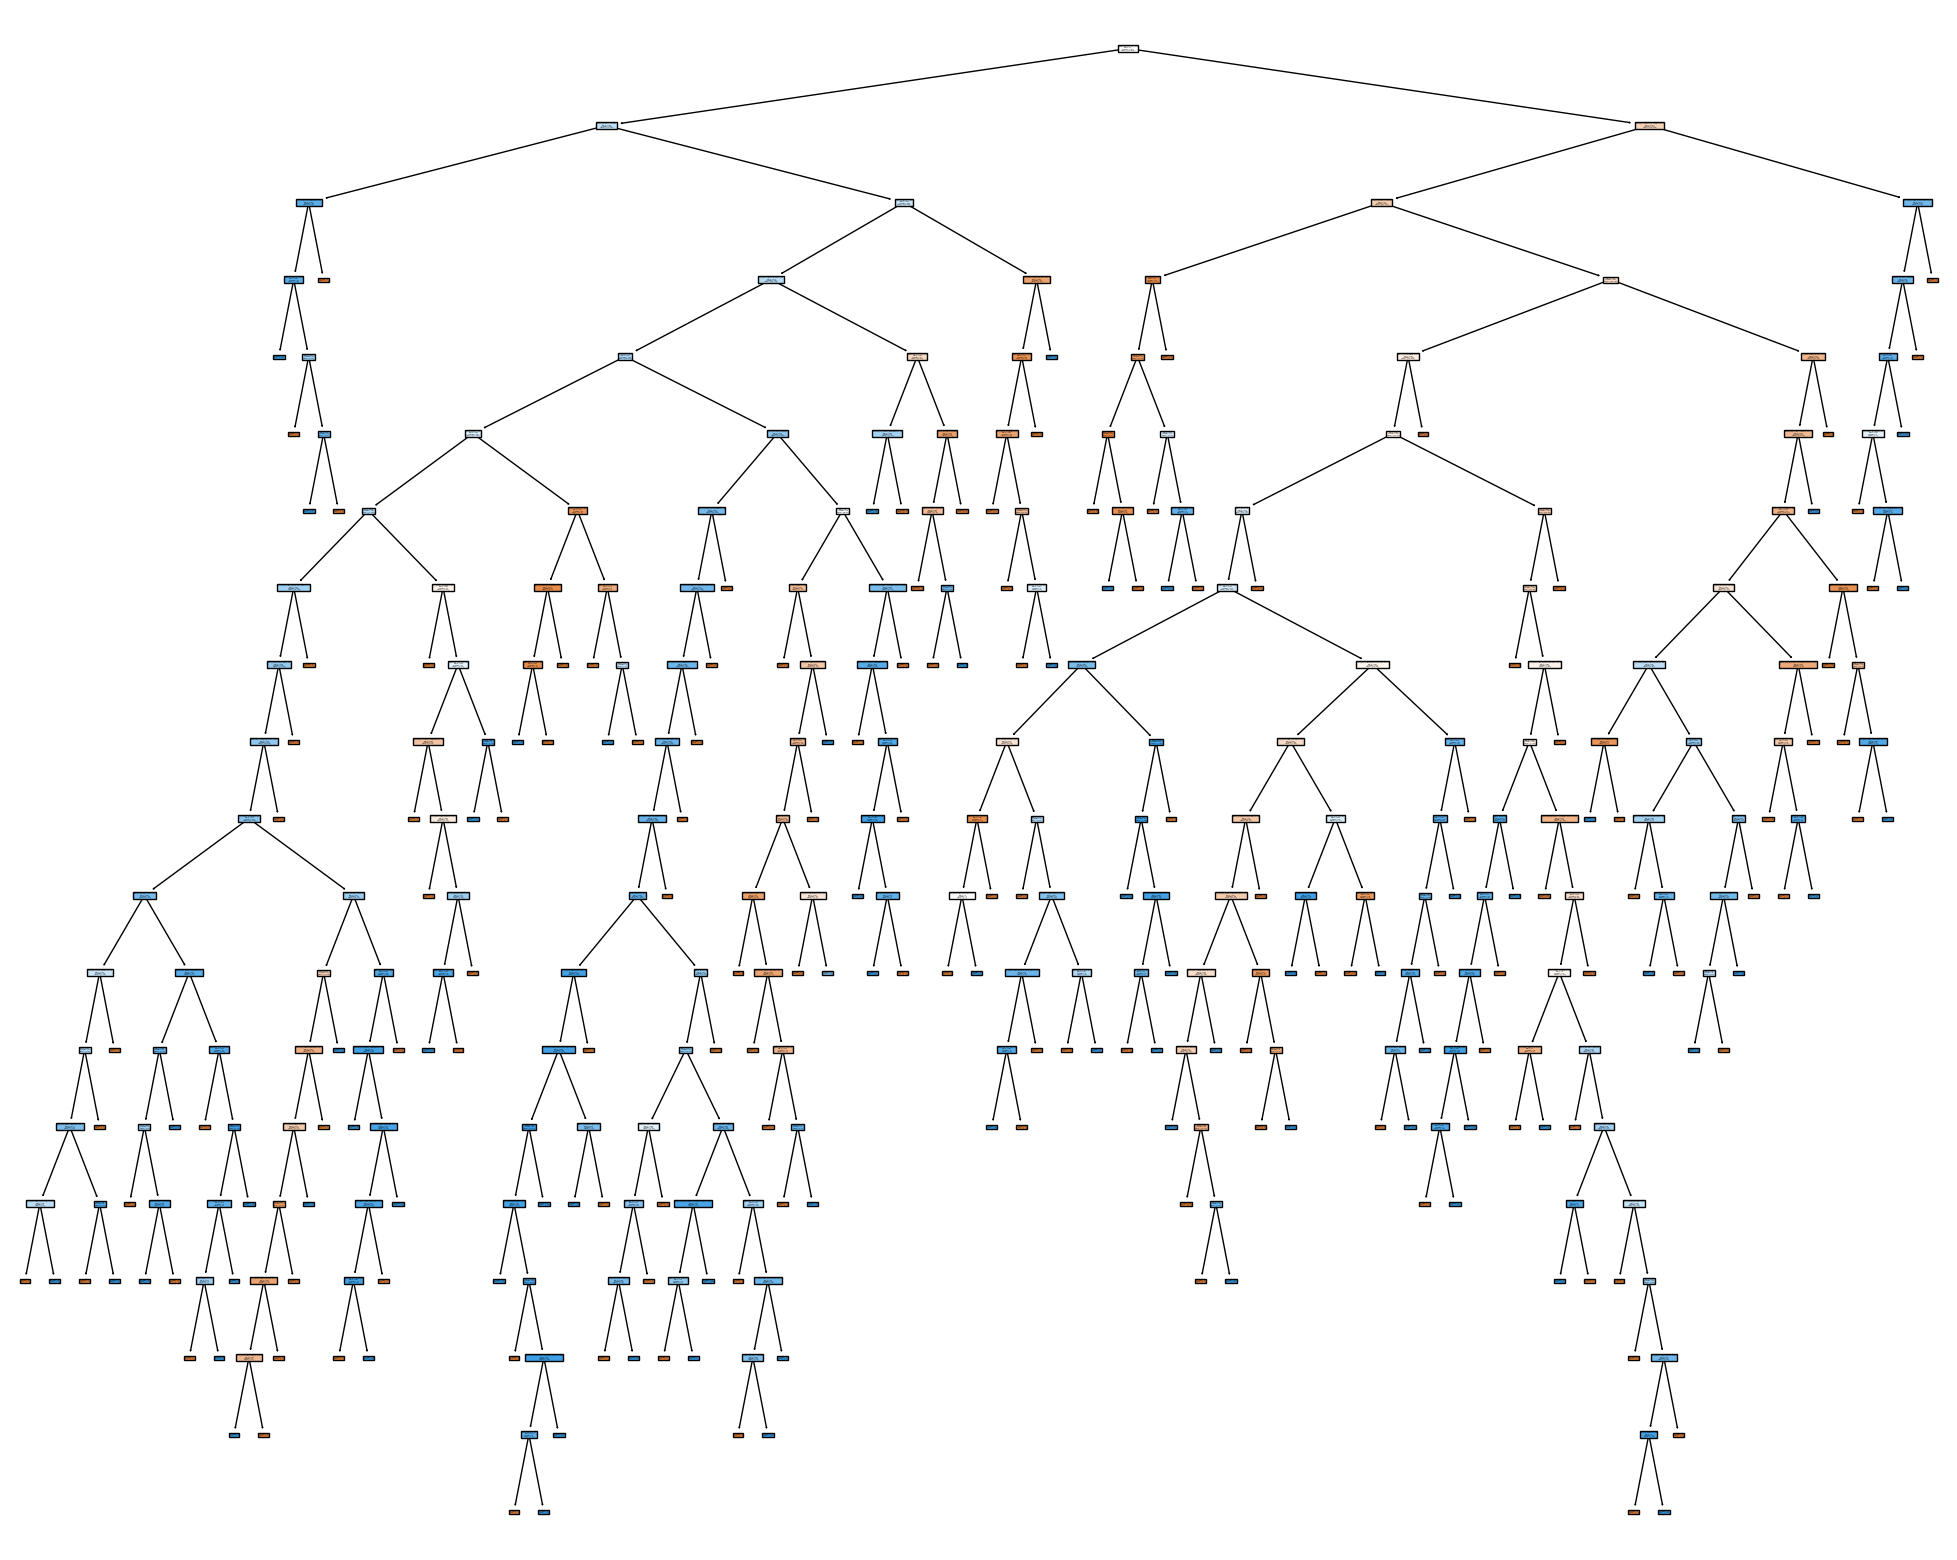

In [188]:
plt.figure(figsize=(25, 20))
plot_tree(individual_tree, feature_names=feature_names,filled=True)
plt.show()